<h1><center>Лабораторная работа №3 "Классификация kNN".</center></h1>
<h1><center>Вахлаева Марина Олеговна</center></h1>

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold


<h3><center>Бинарная классификация</center></h3>

In [2]:
path = 'C:/Users/PC/Downloads/Python/TAI/datasets/'
df1 = pd.read_csv(Path(path, 'diabetes_prediction_dataset.csv'))

In [3]:
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Для бинарной классификации будет использоваться набор данных для прогнозирования диабета. 

Датасет представляет собой совокупность медицинских и демографических данных пациентов, а также их статуса диабета (положительного или отрицательного). Этот набор данных можно использовать для создания моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут подвергаться риску развития диабета, и при разработке индивидуальных планов лечения. Кроме того, набор данных может быть использован исследователями для изучения взаимосвязи между различными медицинскими и демографическими факторами и вероятностью развития диабета.

Ссылка на датасет: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data
        
|       Признак       |       Расшифровка      |
|---------------------|------------------------|
| gender              |Пол                     |
| age                 |Возраст                 | 
| hypertension        |Гипертония              | 
| heart_disease       |Болезни сердца          | 
| smoking_history     |История курения         |
| bmi                 |Индекс массы тела       |
| HbA1c_level         |Уровень HbA1c           | 
| blood_glucose_level |Уровень глюкозы в крови |
| diabetes            |Диабет                  | 

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Предобработка данных**

In [5]:
#Посмотрим, есть ли "non-null" значения
df1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Видно, что в датасете нет "non-null" значений. Думаю, что для прогнозирования диабета не будет важна информация о половом признаке пациента, а также уберем еще признак, связанный с историей курения. Заодно исключим target.

In [6]:
df1_ = df1.drop(['gender','smoking_history', 'diabetes'], axis=1, inplace=False)
df1_

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [7]:
df1_.describe(include='all')

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000


Посмотрим на количественное соотношение классов

In [8]:
df1['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

Наблюдается сильный дисбаланс классов, это может отразиться на результатах точности классификатора.

Категориальные признаки в наборе данных отсуствуют, поэтому перекодировку необходимости делать нет.

**Выполним разбиение на тестовую и тренировочную выборки**

In [9]:
X, y = df1_, df1['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=42)

In [10]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (75000, 6)
y_train shape: (75000,)
X_test shape: (25000, 6)
y_test shape: (25000,)


In [11]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
type(X_test)

pandas.core.frame.DataFrame

**Расчет метрик качества классификации**

In [12]:
y_pred = model_knn.predict(X_test)
acc_1 =accuracy_score(y_pred, y_test) 
precision_1 = precision_score(y_test, y_pred)
rec_1 = recall_score(y_test, y_pred)
f_measure_1 = f1_score(y_test, y_pred)
cl_rep_1 = classification_report(y_test, y_pred)

print('Accuracy: ', acc_1)
print('Precision: ', precision_1)
print('Recall: ', rec_1)
print('f_measure: ', f_measure_1)

print(f"Classification Report: \n {cl_rep_1}")

Accuracy:  0.95456
Precision:  0.8984689766317486
Recall:  0.5247058823529411
f_measure:  0.6625074272133096
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     22875
           1       0.90      0.52      0.66      2125

    accuracy                           0.95     25000
   macro avg       0.93      0.76      0.82     25000
weighted avg       0.95      0.95      0.95     25000



По данным результатам, можно сказать, что 96% предсказанных случаев отсутсвия диабета были верными (precision для класса 0 - 0.96), при наличии диабета правильно предсказанными оказались 90% (precision для класса 1 - 0.9). 99% из всех истинных случаев отсуствия диабета были предсказаны верно (recall для класса 0 - 0.99), 52% из всех истинных случаев наличия диабета были предсказаны верно (recall для класса 1 - 0.52). Такой результат можно объяснить дисбалансом классов. Класс 0 - отсутсвие джиабета количественно превышает класс1 - наличие диабета практически в 10 раз.

**Нормализация данных**

In [ ]:
df1_.describe().T

Проведем нормализацию, поскольку некоторые признаки находястя в разных диапазонах, например имт (bmi) имеет среднее 27.32, а уровень глюкозы в крови (blood_glucose_level) - 138. 

In [ ]:
all_cols = list(df1_.columns)
mm_scaler = MinMaxScaler()
features_scaled = mm_scaler.fit_transform(df1_[all_cols])
df1_scaled = pd.DataFrame(features_scaled, columns=all_cols)
df1_scaled

In [ ]:
df1_scaled.describe().T

Нормализация прошла успешно! 

**Выполним классификацию и оценим результаты модели на нормализованных данных**

In [ ]:
X_sc, y_sc = df1_scaled, df1['diabetes']

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, stratify=y_sc, train_size=0.75, random_state=42)

In [ ]:
model_knn_sc = KNeighborsClassifier(n_neighbors=2)
model_knn_sc.fit(X_train_sc, y_train_sc)

In [ ]:
y_pred_sc = model_knn_sc.predict(X_test_sc)
acc_1_sc =accuracy_score(y_pred_sc, y_test_sc) 
precision_1_sc = precision_score(y_test_sc, y_pred_sc)
rec_1_sc = recall_score(y_test_sc, y_pred_sc)
f_measure_1_sc = f1_score(y_test_sc, y_pred_sc)
cl_rep_1_sc = classification_report(y_test_sc, y_pred_sc)

print('Accuracy с нормализ. данными: ', acc_1_sc)
print('Precision с нормализ. данными: ', precision_1_sc)
print('Recall с нормализ. данными: ', rec_1_sc)
print('f_measure с нормализ. данными: ', f_measure_1_sc)

print(f"Classification Report с нормализ. данными: \n {cl_rep_1_sc}")

Если сравнивать с результатами классификации на ненормализованных данных, то метрики качества стали лучше. Общие значения accuracy, precision, recall, f_measure стали больше. Как и в целом показатели качества классификации отдельно для класса 0 и для класса 1. 

**Построим матрицу корреляции нормализованных признаков**

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Матрица корреляции признаков для датасета "diabetes"')
cmap = sns.diverging_palette(240, 0, s=70, l=80, as_cmap=True)
ax_sns = sns.heatmap(ax = ax, data=df1_scaled.corr(), cmap=sns.cubehelix_palette(as_cmap=True), square=True, annot=True, fmt='.2f', linecolor='white')
ax_sns.set_xticklabels(ax_sns.get_xticklabels(), rotation=45)
ax_sns.set_yticklabels(ax_sns.get_yticklabels(), rotation=0)
plt.subplots_adjust(bottom=0.15)
plt.show()

Думаю, что признаков не так много, чтобы можно было делать какую-то "специальную сортировку". Поэтому выберу признаки, исходя из своих представлений. Из данной матрицы наиболее коррелированы друг с другом признаки "age" и "bmi" (хотя эту корреляцию сложно назвать корреляцией, поскольку значение меньше 0.6; возраст и имт действительно слабы связаны друг с другом, можно сделать лишь поправку на то, что к старости люди полнеют). Наиболее значимыми считаются рпизнаки, которые менее всего коррелируют друг с другуом, поскольку такие признаки будут более широко отражать информацию о данных. Поэтому выберем признаки с наименьшей корреляцией. Это будут признаки "heart_disease", "HbA1c_level", "blood_glucose_level".

*Попробуем выполнить "вычисление" наиболее значимых признаков*

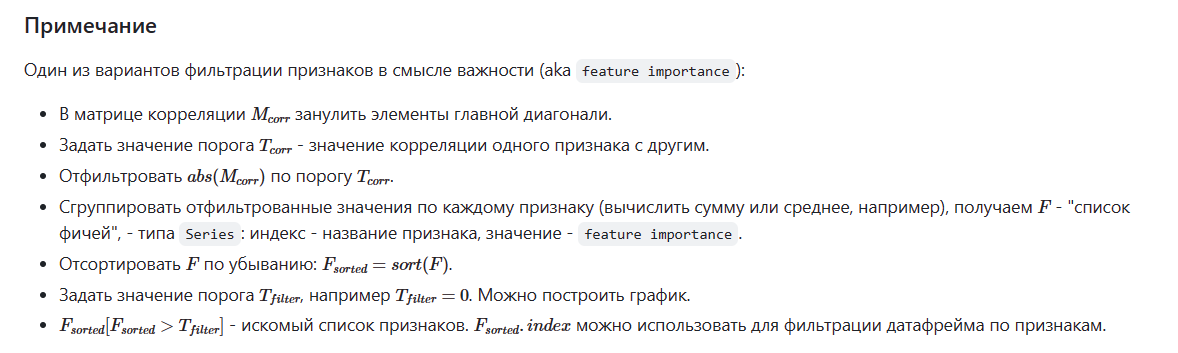

In [ ]:
corr_matrix = df1_scaled.corr().abs()
np.fill_diagonal(corr_matrix.values, 0)

T_corr = 0.1 #Порог корреляции 
filtered_corr = corr_matrix[corr_matrix < T_corr] #Отфильтровка абсолютных значений корреляции по порогу
feature_importance = filtered_corr.sum() #Группировка отфильтрованных значений и вычисление их суммы
feature_importance_sorted = feature_importance.sort_values(ascending=False) #Сортировка значений по убыванию
T_filter = 0.18 #Задание значения порога фильтрации
selected_features = feature_importance_sorted[feature_importance_sorted > T_filter].index.tolist() #Получение списка признаков, прошедших фильтрацию

In [ ]:
print(feature_importance_sorted)

In [ ]:
print(selected_features)

Попробуем для дальнейшего анализа использовать выбранные признаки (хотя этот датасет маленький и тут все признаки не коррелируют друг с другом, что и так должно давать удовлетворительные результаты). 

**Бинарная классификация с отобранными признакми**

In [ ]:
x_sort = df1_scaled[['blood_glucose_level', 'bmi', 'HbA1c_level', 'heart_disease']]

In [ ]:
X_sort, y_sort = x_sort, df1['diabetes']

X_train_sort, X_test_sort, y_train_sort, y_test_sort = train_test_split(X_sort, y_sort, stratify=y_sort, train_size=0.75, random_state=42)

In [ ]:
model_knn_sort = KNeighborsClassifier(n_neighbors=2)
model_knn_sort.fit(X_train_sort, y_train_sort)

In [ ]:
y_pred_sort = model_knn_sort.predict(X_test_sort)
acc_1_sort =accuracy_score(y_pred_sort, y_test_sort) 
precision_1_sort = precision_score(y_test_sort, y_pred_sort)
rec_1_sort = recall_score(y_test_sort, y_pred_sort)
f_measure_1_sort = f1_score(y_test_sort, y_pred_sort)
cl_rep_1_sort = classification_report(y_test_sort, y_pred_sort)

print('Accuracy при отобранных признаках: ', acc_1_sort)
print('Precision при отобранных признаках: ', precision_1_sort)
print('Recall при отобранных признаках: ', rec_1_sort)
print('f_measure при отобранных признаках: ', f_measure_1_sort)

print(f"Classification Report при отобранных признаках: \n {cl_rep_1_sort}")

Если сравнивать с результатами, полученными при использовании всех нормализованных признаков, то нельзя сказать, что результат стал намного лучше. Это объясняется тем, что изначально присутсвовали все признаки с маленьким коэффициентом корреляции друг с другом, скоращение списка этих признаков привело к уменьшению полезной информации для классификации диабета. Из положительных изменений - увеличилась метрика Accuracy как в общем показателе, так и для предсказания класса 1. Но для класса 1 уменьшились другие метрики, такие как recall и f_measure, что свидетельствует об уменьшении способности модели классифицировать истинные случаи диабета, также чаще происходят ошибки первого и второго рода. 

**Перебрать значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данных**

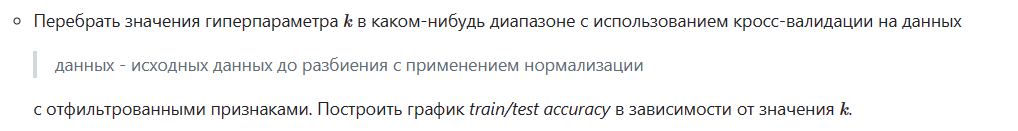

По заданию не очень понятно, на каких данных нужно выполнять кросс-валидацию, я выполнила на нормализованных данных после отбора признаков. 

In [ ]:
train_score = []
test_score = []
crossval_score = []

for k in range(1, 16):
    clf = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(clf, X_sort, y_sort, cv = StratifiedKFold(10))
    print(f"Neighbors: {k}, stratified folds count: 10 avg score: {scores.mean()}")
    crossval_score.append(scores.mean())
    clf.fit(X_train_sort, y_train_sort)
    pred_train = clf.predict(X_train_sort)
    pred_test = clf.predict(X_test_sort)

    train_score.append(accuracy_score(y_train_sort, pred_train))
    test_score.append(accuracy_score(y_test_sort, pred_test))

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(range(1, 16), train_score, label="train accuracy")
ax.plot(range(1, 16), test_score, label="test accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Neighbors count")
ax.set_xticks(range(1, 16))
ax.legend()

Для кросс валидации использовался метод `StratifiedKFold`- стратифицированная перекрестная проверка, в которой данные разбиваются с учетом балансирования классов. Отдельно был построен график изменения точности при разном гиперпараметре k - количества соседей в классификаторе. 

<h3><center>Многоклассовая классификация</center></h3>

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine_data = load_wine()

df2 = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df2['target'] = wine_data.target


In [ ]:
df2

Для многоклассовой классификации будет использоваться набор данных распознавания вина. 

Данные являются результатами химического анализа вин, выращенных в одном и том же месте в Италии тремя разными культиваторами. Существует тринадцать различных параметров, которые были измерены для трех типов вин (класс 0, класс 1, класс 2).

Ссылка на датасет: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset
        
|       Признак                |       Расшифровка               |
|------------------------------|---------------------------------|
| Alcohol                      | Алкоголь                        |
| Malic_acid                   | Яблочная кислота                | 
| Ash                          | Зола                            | 
| Alcalinity_of_ash            | Щелочность золы                 | 
| Magnesium                    | Магний                          |
| Total_phenols                | Всего фенолов                   |
| Flavanoids                   | Флавоноиды                      | 
| Nonflavanoid_phenols         | Нефлавоноидные фенолы           |
| Proanthocyanins              | Проантоцианы                    | 
| Color_intensity              | Интенсивность цвета             |
| Hue                          | Оттенок                         |
| Od280/od315_of_diluted_wines | OD280/OD315 для разбавленных вин|
| Proline                      | Пролин                          |

In [ ]:
df2.info()

Все данные в датасете количественные.

In [ ]:
df2.describe()

**Предобработка данных**

In [ ]:
df2.isnull().sum()

Видно, что в датасете нет "non-null" значений. Исключать пока что никакие признаки не будем, выполним это на этапе построения матрицы корреляции.

In [ ]:
df2['target'].value_counts()

**Выполним нормализацию данных**

In [ ]:
#Убираем target
df2_ = df2.drop(['target'], axis=1, inplace=False)
df2_

In [ ]:
all_cols2 = list(df2_.columns)
mm_scaler2 = MinMaxScaler()
features_scaled2 = mm_scaler2.fit_transform(df2_[all_cols2])
df2_scaled = pd.DataFrame(features_scaled2, columns=all_cols2)
df2_scaled

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7.5))
sns.boxenplot(data = df2_scaled, ax = ax)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)
plt.show()

**Выполним классификацию на нормализованных данных**

In [ ]:
X_2, y_2 = df2_scaled, df2['target']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y_2, train_size=0.75, random_state=42)

In [ ]:
model_knn_2 = KNeighborsClassifier(n_neighbors=3)
model_knn_2.fit(X_train_2, y_train_2)

In [ ]:
y_pred_2 = model_knn_2.predict(X_test_2)
acc_2 =accuracy_score(y_pred_2, y_test_2) 
precision_2 = precision_score(y_test_2, y_pred_2, average='weighted')
rec_2 = recall_score(y_test_2, y_pred_2, average='weighted')
f_measure_2 = f1_score(y_test_2, y_pred_2, average='weighted')
cl_rep_2 = classification_report(y_test_2, y_pred_2)

print('Accuracy с нормализ. данными: ', acc_2)
print('Precision с нормализ. данными: ', precision_2)
print('Recall с нормализ. данными: ', rec_2)
print('f_measure с нормализ. данными: ', f_measure_2)

print(f"Classification Report с нормализ. данными: \n {cl_rep_2}")

**Построим матрицу корреляции нормализованных признаков**

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Матрица корреляции признаков для датасета "wine"')
cmap = sns.diverging_palette(240, 0, s=70, l=80, as_cmap=True)
ax_sns = sns.heatmap(ax = ax, data=df2_scaled.corr(), cmap=sns.cubehelix_palette(as_cmap=True), square=True, annot=True, fmt='.2f', linecolor='white')
ax_sns.set_xticklabels(ax_sns.get_xticklabels(), rotation=45)
ax_sns.set_yticklabels(ax_sns.get_yticklabels(), rotation=0)
plt.subplots_adjust(bottom=0.15)
plt.show()

Из корреляционной матрицы видно, что наиболее коррелирующие между собой признаки: 
- "flavanoids" и "total_phenols";
- "total_phenols" и "proanthocyanins";
- "flavanoids" и "proanthocyanins";
- "od280/od315_of_diluted_wines" и "total_phenols"; 
- "od280/od315_of_diluted_wines" и "flavanoids"; 
- "alcohol" и "proline". 

Можно убрать признаки: "proline", "flavanoids" и "total_phenols". Отсавшиеся признаки будут иметь меньший коэффициент корреляции, следовательно, будут более значимыми для классифкации. 

Выполним "расчет" наиболее значимых признаков: 

In [ ]:
corr_matrix_ = df2_scaled.corr().abs()
np.fill_diagonal(corr_matrix_.values, 0)

T_corr_2 = 0.5 #Порог корреляции 
filtered_corr_ = corr_matrix_[corr_matrix_ < T_corr_2] #Отфильтровка абсолютных значений корреляции по порогу
feature_importance_ = filtered_corr_.sum() #Группировка отфильтрованных значений и вычисление их суммы
feature_importance_sorted_ = feature_importance_.sort_values(ascending=False) #Сортировка значений по убыванию
T_filter_2 = 1.85 #Задание значения порога фильтрации
selected_features_ = feature_importance_sorted_[feature_importance_sorted_ > T_filter_2].index.tolist() #Получение списка признаков, прошедших фильтрацию

In [ ]:
print(selected_features_)

Попробуем выполнить классификацию и по выборке признаков, что была выполнена по корреляционной матрице "на глаз", и по выборке признаков, что были получены при помощи расчетов.

In [ ]:
df2_sort_1 = df2_scaled.drop(["proline", "flavanoids", "total_phenols"], axis=1, inplace=False)
df2_sort_2 = df2_scaled[['proline', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'total_phenols', 'malic_acid', 'magnesium', 'ash', 'flavanoids', 'color_intensity']]

In [ ]:
df2_sort_1

In [ ]:
df2_sort_2

In [ ]:
X_2_sort1, y_2_sort1 = df2_sort_1, df2['target']

X_train_2_sort1, X_test_2_sort1, y_train_2_sort1, y_test_2_sort1 = train_test_split(X_2_sort1, y_2_sort1, 
                                                                                    stratify=y_2_sort1, train_size=0.75, 
                                                                                    random_state=42)

In [ ]:
model_knn_2_sort1 = KNeighborsClassifier(n_neighbors=3)
model_knn_2_sort1.fit(X_train_2_sort1, y_train_2_sort1)

In [ ]:
y_pred_2_sort1 = model_knn_2_sort1.predict(X_test_2_sort1)
acc_2_sort1 =accuracy_score(y_pred_2_sort1, y_test_2_sort1) 
precision_2_sort1 = precision_score(y_test_2_sort1, y_pred_2_sort1, average='weighted')
rec_2_sort1 = recall_score(y_test_2_sort1, y_pred_2_sort1, average='weighted')
f_measure_2_sort1 = f1_score(y_test_2_sort1, y_pred_2_sort1, average='weighted')
cl_rep_2_sort1 = classification_report(y_test_2_sort1, y_pred_2_sort1)

print('Accuracy с отсортированными признаками (1): ', acc_2_sort1)
print('Precision с отсортированными признаками (1): ', precision_2_sort1)
print('Recall с отсортированными признаками (1): ', rec_2_sort1)
print('f_measure с отсортированными признаками (1): ', f_measure_2_sort1)

print(f"Classification Report с отсортированными признаками (1): \n {cl_rep_2_sort1}")

Общие показатели качества стали хуже, чем при использовании всех нормализованных признаков. Скорее всего были исключены признаки, несущие важную информацию о классе.  

Теперь выполним классификацию на отсортированных признаках, которые были получены в результате "расчета"

In [ ]:
X_2_sort2, y_2_sort2 = df2_sort_2, df2['target']

X_train_2_sort2, X_test_2_sort2, y_train_2_sort2, y_test_2_sort2 = train_test_split(X_2_sort2, y_2_sort2, 
                                                                                    stratify=y_2_sort2, train_size=0.75, 
                                                                                    random_state=42)

In [ ]:
model_knn_2_sort2 = KNeighborsClassifier(n_neighbors=3)
model_knn_2_sort2.fit(X_train_2_sort2, y_train_2_sort2)

In [ ]:
y_pred_2_sort2 = model_knn_2_sort2.predict(X_test_2_sort2)
acc_2_sort2 =accuracy_score(y_pred_2_sort2, y_test_2_sort2) 
precision_2_sort2 = precision_score(y_test_2_sort2, y_pred_2_sort2, average='weighted')
rec_2_sort2 = recall_score(y_test_2_sort2, y_pred_2_sort2, average='weighted')
f_measure_2_sort2 = f1_score(y_test_2_sort2, y_pred_2_sort2, average='weighted')
cl_rep_2_sort2 = classification_report(y_test_2_sort2, y_pred_2_sort2)

print('Accuracy с отсортированными признаками (2): ', acc_2_sort2)
print('Precision с отсортированными признаками (2): ', precision_2_sort2)
print('Recall с отсортированными признаками (2): ', rec_2_sort2)
print('f_measure с отсортированными признаками (2): ', f_measure_2_sort2)

print(f"Classification Report с отсортированными признаками (2): \n {cl_rep_2_sort2}")

Результат стал еще хуже. Вывод: не нужно исключать признаки из данного датасета. Будем использовать в дальнейших пунктах данный после нормализации без исключения признаков.

**Перебрать значения гиперпараметра k в каком-нибудь диапазоне с использованием кросс-валидации на данных**

In [ ]:
train_score_ = []
test_score_ = []
crossval_score_ = [] 

for k in range(1, 16):
    clf_ = KNeighborsClassifier(n_neighbors = k)
    scores_ = cross_val_score(clf_, X_2, y_2, cv = StratifiedKFold(10))
    print(f"Neighbors: {k}, stratified folds count: 10 avg score: {scores_.mean()}")
    crossval_score_.append(scores_.mean())
    clf_.fit(X_train_2, y_train_2)
    pred_train_ = clf_.predict(X_train_2)
    pred_test_ = clf_.predict(X_test_2)

    train_score_.append(accuracy_score(y_train_2, pred_train_))
    test_score_.append(accuracy_score(y_test_2, pred_test_))

По данному датасету классифкатору больше нравится использовать 12 соседей для повышения точности

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(range(1, 16), train_score_, label="train accuracy")
ax.plot(range(1, 16), test_score_, label="test accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Neighbors count")
ax.set_xticks(range(1, 16))
ax.legend()

**Для лучшего классификатора привести метрики, classification_report, построить confusion matrix**

Лучшее значение точности было выбрано при k = 12.

In [ ]:
Result_model = KNeighborsClassifier(n_neighbors=12)
Result_model.fit(X_train_2, y_train_2)

In [ ]:
y_pred_res = Result_model.predict(X_test_2)
acc_res =accuracy_score(y_pred_res, y_test_2) 
precision_res = precision_score(y_test_2, y_pred_res, average='weighted')
rec_res = recall_score(y_test_2, y_pred_res, average='weighted')
f_measure_res = f1_score(y_test_2, y_pred_res, average='weighted')
cl_rep_res = classification_report(y_test_2, y_pred_res)

print('Accuracy итоговой модели: ', acc_res)
print('Precision итоговой модели: ', precision_res)
print('Recall итоговой модели: ', rec_res)
print('f_measure итоговой модели: ', f_measure_res)

print(f"Classification Report итоговой модели: \n {cl_rep_res}")

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_2, y_pred_res)
print(cm)

In [ ]:
sns.heatmap(data=cm, cmap=sns.cubehelix_palette(as_cmap=True), square=True, annot=True, fmt='d', 
            xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])

Выводы по матрице ошибок:
- Для класса 0 модель правильно предсказала 15 случаев, допустила одну ошибку второго рода, приняв один из случаев за 1-ый класс; 
- Для класса 1 модель правильно предсказала 17 и не допустила ни одной ошибки первого и второго рода, о чем и говорит precision = 1 для данного класса; 
- Для класса 2 модель правильно предсказала 12 случаев, аналогично 1-му классу не допустила ни одну из ошибок. 